In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from matplotlib.collections import LineCollection
from sklearn.metrics import RocCurveDisplay,confusion_matrix, ConfusionMatrixDisplay

In [2]:
y_pred = pd.read_csv('ics_anomaly_value.csv')
y = pd.read_csv('ics_true_value.csv')

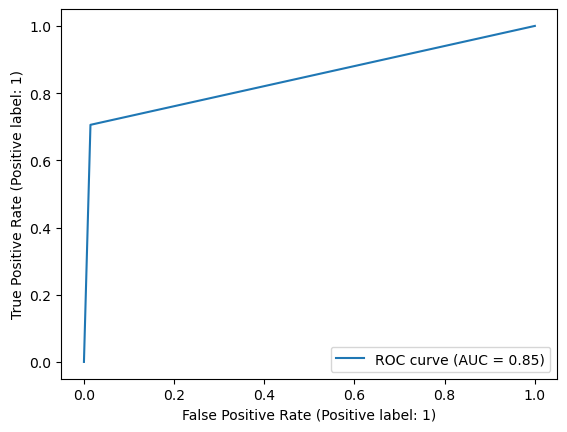

In [3]:
plot = RocCurveDisplay.from_predictions(y,y_pred,pos_label=1,name='ROC curve',linewidth=1.5)

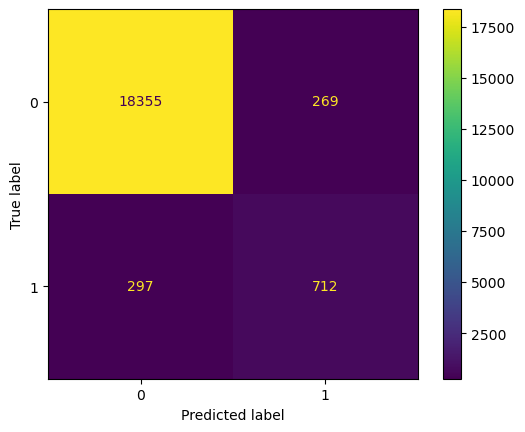

In [4]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()